# Reading File

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
gwater = pd.read_csv('geotracker_sites_2024-11-01.csv', encoding = 'latin-1')

# Exploring Data

In [39]:
gwater.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)


In [40]:
gwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GLOBAL_ID                          75063 non-null  object 
 1   BUSINESS_NAME                      75059 non-null  object 
 2   STREET_NUMBER                      63339 non-null  object 
 3   STREET_NAME                        73457 non-null  object 
 4   CITY                               75023 non-null  object 
 5   STATE                              75063 non-null  object 
 6   ZIP                                70748 non-null  object 
 7   COUNTY                             75056 non-null  object 
 8   EPA_REGION                         75063 non-null  int64  
 9   LATITUDE                           74437 non-null  float64
 10  LONGITUDE                          74437 non-null  float64
 11  COORDINATE_SOURCE                  60899 non-null  obj

# Cleaning The Data

### Step 1: Check For Nulls

In [43]:
# Checking the percentage of nulls in each column
((gwater.isna().sum()/gwater.shape[0])*100).sort_values()

GLOBAL_ID                             0.000000
MILITARY_DOD_SITE                     0.000000
STATE                                 0.000000
EPA_REGION                            0.000000
CASE_TYPE                             0.000000
STATUS                                0.000000
STATUS_DATE                           0.003997
BUSINESS_NAME                         0.005329
COUNTY                                0.009325
CITY                                  0.053289
LATITUDE                              0.833966
LONGITUDE                             0.833966
LEAD_AGENCY                           1.123057
STREET_NAME                           2.139536
RWQCB_REGION                          3.229287
CALWATER_WATERSHED_NAME               3.579660
BEGIN_DATE                            5.143679
ZIP                                   5.748505
CALENVIROSCREEN3_SCORE                6.591796
CALENVIROSCREEN4_SCORE                7.003450
STREET_NUMBER                        15.618880
DWR_GROUNDWAT

### Step 2: Drop Columns

In [45]:
# Dropping the columns with > 20% of nulls
clean_gwater = gwater.drop(columns=['NO_FURTHER_ACTION_DATE', 'RB_CASE_NUMBER', 'POTENTIAL_MEDIA_OF_CONCERN',
                                    'POTENTIAL_CONTAMINANTS_OF_CONCERN','LEAK_REPORTED_DATE','CASEWORKER',
                                    'LOCAL_AGENCY','FILE_LOCATION','LOC_CASE_NUMBER','HOW_DISCOVERED',
                                    'DISCHARGE_SOURCE','DISCHARGE_CAUSE','SITE_HISTORY','CLAIM_STATUS','CLAIM_NO',
                                    'STOP_METHOD','DISADVANTAGED_COMMUNITY','QUANTITY_RELEASED_GALLONS',
                                    'HOW_DISCOVERED_DESCRIPTION', 'STOP_DESCRIPTION', 'FACILITY_PROJECT_SUBTYPE'])

In [46]:
# Viewing Clean Data
clean_gwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GLOBAL_ID                      75063 non-null  object 
 1   BUSINESS_NAME                  75059 non-null  object 
 2   STREET_NUMBER                  63339 non-null  object 
 3   STREET_NAME                    73457 non-null  object 
 4   CITY                           75023 non-null  object 
 5   STATE                          75063 non-null  object 
 6   ZIP                            70748 non-null  object 
 7   COUNTY                         75056 non-null  object 
 8   EPA_REGION                     75063 non-null  int64  
 9   LATITUDE                       74437 non-null  float64
 10  LONGITUDE                      74437 non-null  float64
 11  COORDINATE_SOURCE              60899 non-null  object 
 12  CASE_TYPE                      75063 non-null 

### Step 3: Fix Data Type

In [48]:
# Changes to do:
    # obj -> Date : ['STATUS_DATE','BEGIN_DATE']

clean_gwater[['STATUS_DATE', 'BEGIN_DATE']] = clean_gwater[['STATUS_DATE', 'BEGIN_DATE']].apply(pd.to_datetime)

In [49]:
# Check for The Change
clean_gwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   GLOBAL_ID                      75063 non-null  object        
 1   BUSINESS_NAME                  75059 non-null  object        
 2   STREET_NUMBER                  63339 non-null  object        
 3   STREET_NAME                    73457 non-null  object        
 4   CITY                           75023 non-null  object        
 5   STATE                          75063 non-null  object        
 6   ZIP                            70748 non-null  object        
 7   COUNTY                         75056 non-null  object        
 8   EPA_REGION                     75063 non-null  int64         
 9   LATITUDE                       74437 non-null  float64       
 10  LONGITUDE                      74437 non-null  float64       
 11  COORDINATE_SOUR

### Step 4: Data Analysis

#### A) Count of Cases Status

In [52]:
# Question 1 : What is the distribution of open and closed groundwater contamination cases,
            # and which areas exhibit the highest concentration of active cases?

# Check for unique status
clean_gwater['STATUS'].nunique()

51

In [53]:
# Concider all not closed cases as 'open':
clean_gwater['STATUS_clean'] = clean_gwater['STATUS'].apply(
    lambda x: 'Closed' if x == 'Completed - Case Closed' else 'Open'
)

<Axes: title={'center': 'Groundwater Contamination Cases in CA'}, ylabel='Case Status'>

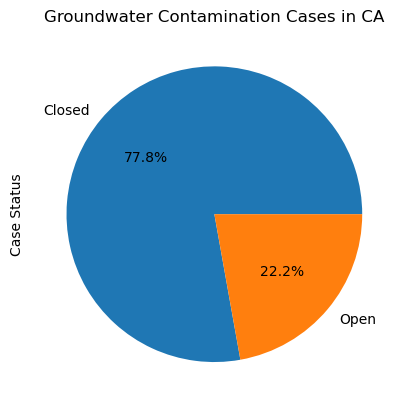

In [54]:
# Count cases status (percentage):
clean_gwater['STATUS_clean'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                 title='Groundwater Contamination Cases in CA', ylabel='Case Status')

In [55]:
# Count of Cases in each RWQCB_REGION (Descending):

cols_to_see = ["STATUS_clean", "RWQCB_REGION"]
region_count = (clean_gwater[cols_to_see].groupby(["STATUS_clean", "RWQCB_REGION"]).value_counts().unstack()
                .sort_values(by = "STATUS_clean", ascending = False).transpose().head(5))
region_count

STATUS_clean,Open,Closed
RWQCB_REGION,,
CENTRAL COAST RWQCB (REGION 3),964,2933
CENTRAL VALLEY RWQCB (REGION 5F),1352,3981
CENTRAL VALLEY RWQCB (REGION 5R),227,1209
CENTRAL VALLEY RWQCB (REGION 5S),1895,6070
COLORADO RIVER BASIN RWQCB (REGION 7),217,1063


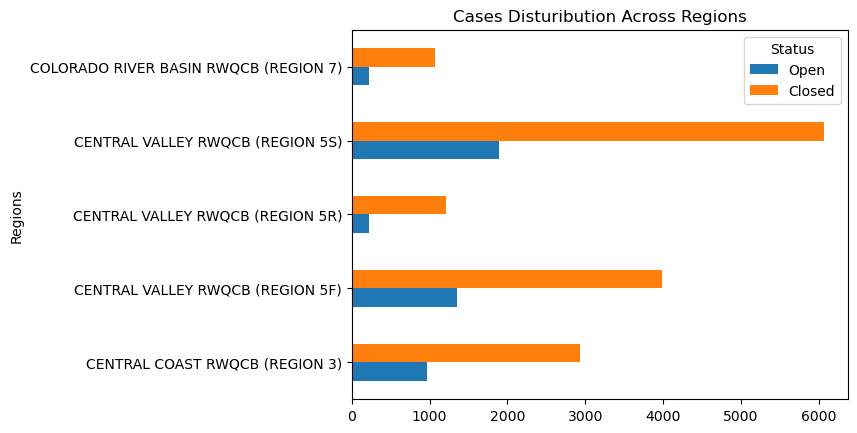

In [56]:
# Visualize cases disturibution across regions:
region_count.plot(kind='barh', title='Cases Disturibution Across Regions', ylabel='Regions').legend(title='Status')

In [57]:
# Groundwater contamination case statuses distributed across counties:

cols_to_see = ["STATUS_clean", "COUNTY"]
county_count = (clean_gwater[cols_to_see].groupby(["STATUS_clean", "COUNTY"]).value_counts().unstack()
                .sort_values(by = "STATUS_clean", ascending = False).transpose().head(5))
county_count

STATUS_clean,Open,Closed
COUNTY,,
Alameda,1327,3304
Alpine,3,23
Amador,44,78
Butte,59,382
Calaveras,35,133


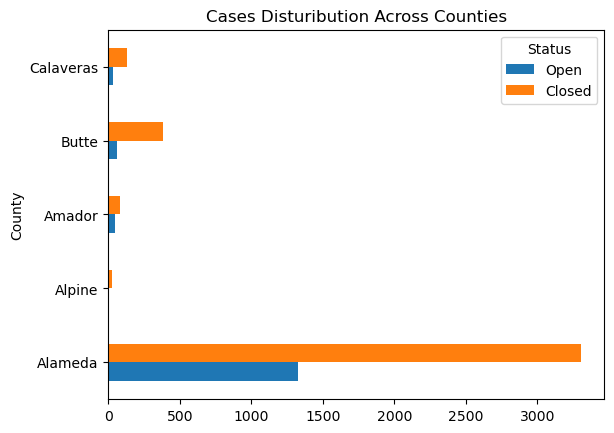

In [58]:
# Visualize cases disturibution across counties:
county_count.plot(kind='barh', title='Cases Disturibution Across Counties', ylabel='County').legend(title='Status')

#### B) Count Case Types

In [60]:
# Question 2: Which types of contamination are most common in California?

#count case types
Case_count = (clean_gwater['CASE_TYPE'].value_counts().sort_values(ascending=False))
Case_count


CASE_TYPE
LUST Cleanup Site                                         42235
Cleanup Program Site                                      17142
Military Cleanup Site                                      3736
Military UST Site                                          2932
Non-Case Information                                       2885
Land Disposal Site                                         2113
Single-Walled UST                                           825
Underground Injection Control (UIC)                         759
Produced Water Ponds                                        748
Military Privatized Site                                    672
Sampling Point - Public                                     508
* NPDES                                                     217
Project                                                      80
* Confined Animal Facilities (CAF)                           72
Other Oil and Gas Projects                                   68
Well Stimulation Project - Exc

In [61]:
# remove the none-case
filtered_gwater = clean_gwater[clean_gwater['CASE_TYPE'] != 'Non-Case Information']

# The top 5 case counts
Case_count = filtered_gwater['CASE_TYPE'].value_counts().sort_values(ascending=False).head(5)
Case_count

CASE_TYPE
LUST Cleanup Site        42235
Cleanup Program Site     17142
Military Cleanup Site     3736
Military UST Site         2932
Land Disposal Site        2113
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 Contamination Case Types'}, xlabel='Number of Cases', ylabel='Contamination Cases'>

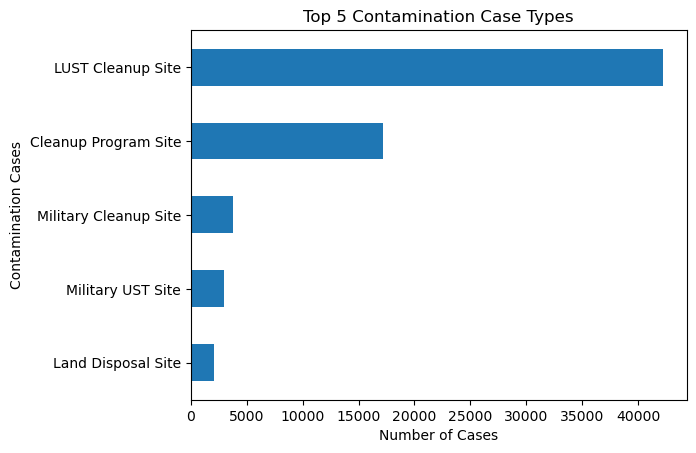

In [62]:
# visaulize top 5 contamination case types
Case_count.sort_values(ascending=True).plot( kind='barh',title='Top 5 Contamination Case Types',ylabel='Contamination Cases',xlabel='Number of Cases')

#### C) Case spread and counts per year

#### Q3.A: How cases are spread across different periods?

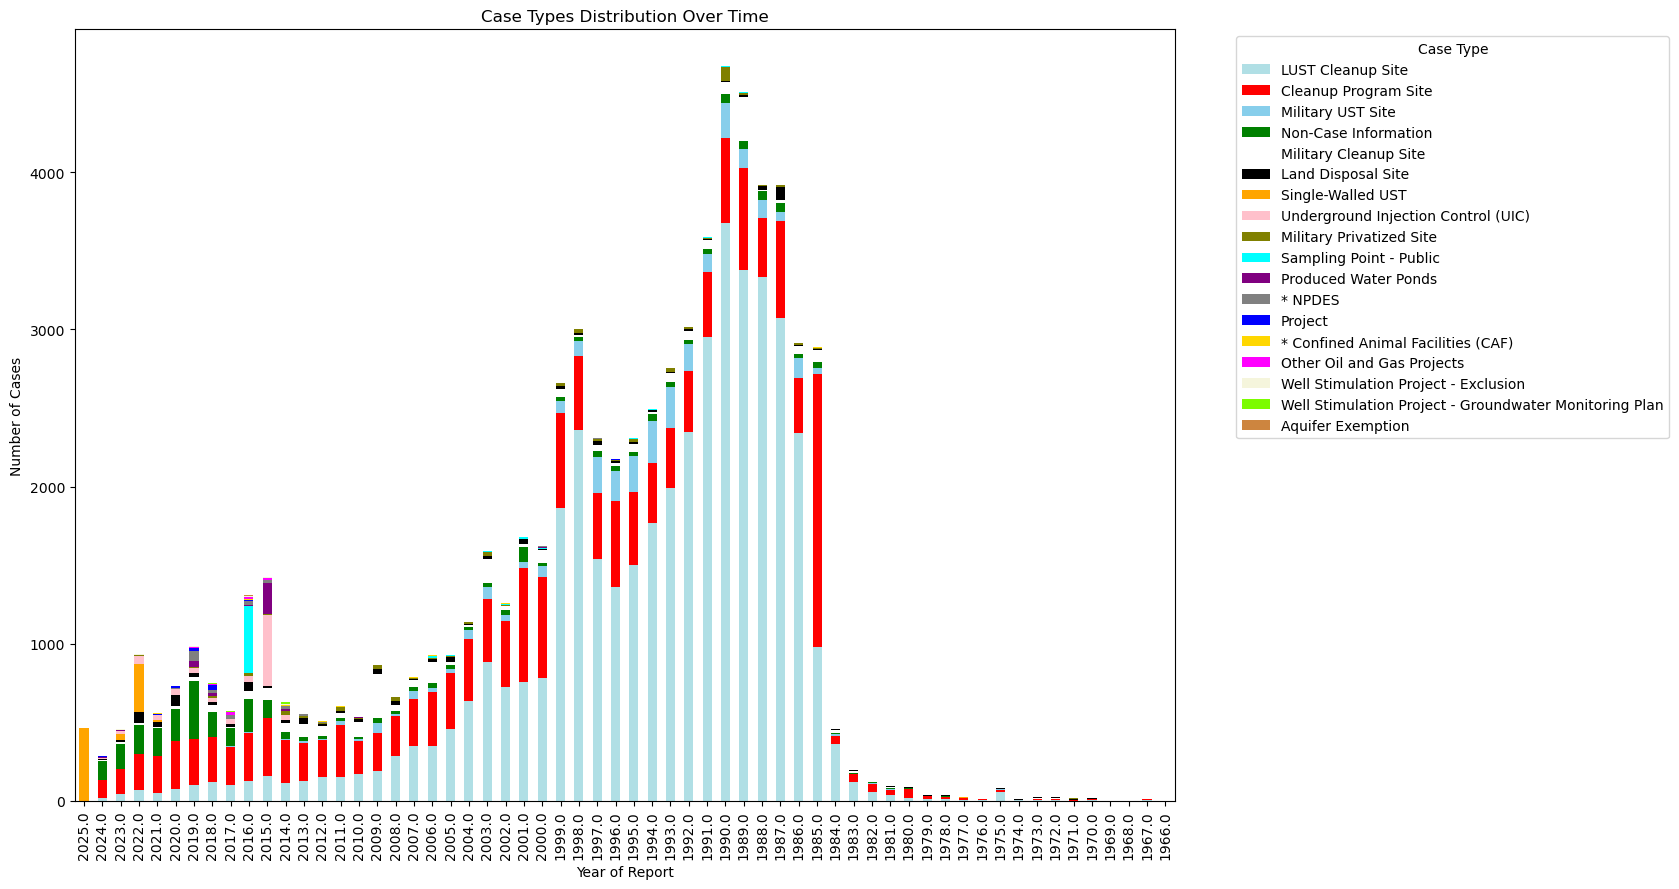

CASE_TYPE
LUST Cleanup Site                                         1990.0
Cleanup Program Site                                      1985.0
Military UST Site                                         1994.0
Non-Case Information                                      2019.0
Military Cleanup Site                                     1989.0
Land Disposal Site                                        1987.0
Single-Walled UST                                         2025.0
Underground Injection Control (UIC)                       2015.0
Military Privatized Site                                  1990.0
Sampling Point - Public                                   2016.0
Produced Water Ponds                                      2015.0
* NPDES                                                   2019.0
Project                                                   2018.0
* Confined Animal Facilities (CAF)                        2016.0
Other Oil and Gas Projects                                2017.0
Well Stimulatio

In [65]:
## Q3.A: How cases are spread across different periods?

try:
    clean_gwater

    #Create YEAR_REPORTED column and the case_by_year DataFrame ---
    clean_gwater["YEAR_REPORTED"] = clean_gwater["BEGIN_DATE"].dt.year
        
    # create the data frame
    
    case_by_year = (clean_gwater.dropna(subset=['CASE_TYPE', 'YEAR_REPORTED'])
                                .groupby(["CASE_TYPE", "YEAR_REPORTED"])['GLOBAL_ID']
                                .count()
                                .unstack(fill_value=0)
                                .transpose())

    ###print("\n'case_by_year' DataFrame:")
    ###print(case_by_year.tail())

          #Delete invalid years (e.g. the year 2099)
    if 2099.0 in case_by_year.index:
                    case_by_year = case_by_year.drop(2099.0)
  
    # Sort dates
    case_by_year_sorted_dates = case_by_year.sort_index(ascending=False)

    # Sort case types
    case_type_sums = case_by_year_sorted_dates.sum().sort_values(ascending=False)
    case_type_final_sorted = case_by_year_sorted_dates[case_type_sums.index]
    
    ###print("\n'case_by_year_sorted' :")
    ###print(case_type_final_sorted.tail())


    ## Visualising cases type vs. time line 
    
    custom_colors = ['#b0dfe5', 'red', 'skyblue', 'green', 'white','black','orange','pink','olive','cyan','purple','gray','blue','gold','fuchsia'
                     ,'beige'
                    ,'lawngreen','peru']

    plt.figure(figsize=(17, 9))
    case_type_final_sorted.plot(kind='bar', stacked=True, ax=plt.gca(), color=custom_colors)
    plt.title('Case Types Distribution Over Time')
    plt.xlabel('Year of Report')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=90)
    plt.legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\n")
###case_type_final_sorted
year_highest_count = case_type_final_sorted.idxmax()
year_highest_count




#### Q3.B: How did the process of How has the frequency of groundwater contamination case updates evolved over time, and are there any specific years or periods that show a significant increase or decrease in update activity


In [67]:
clean_gwater["YEAR_UPDATED"] = clean_gwater["STATUS_DATE"].dt.year

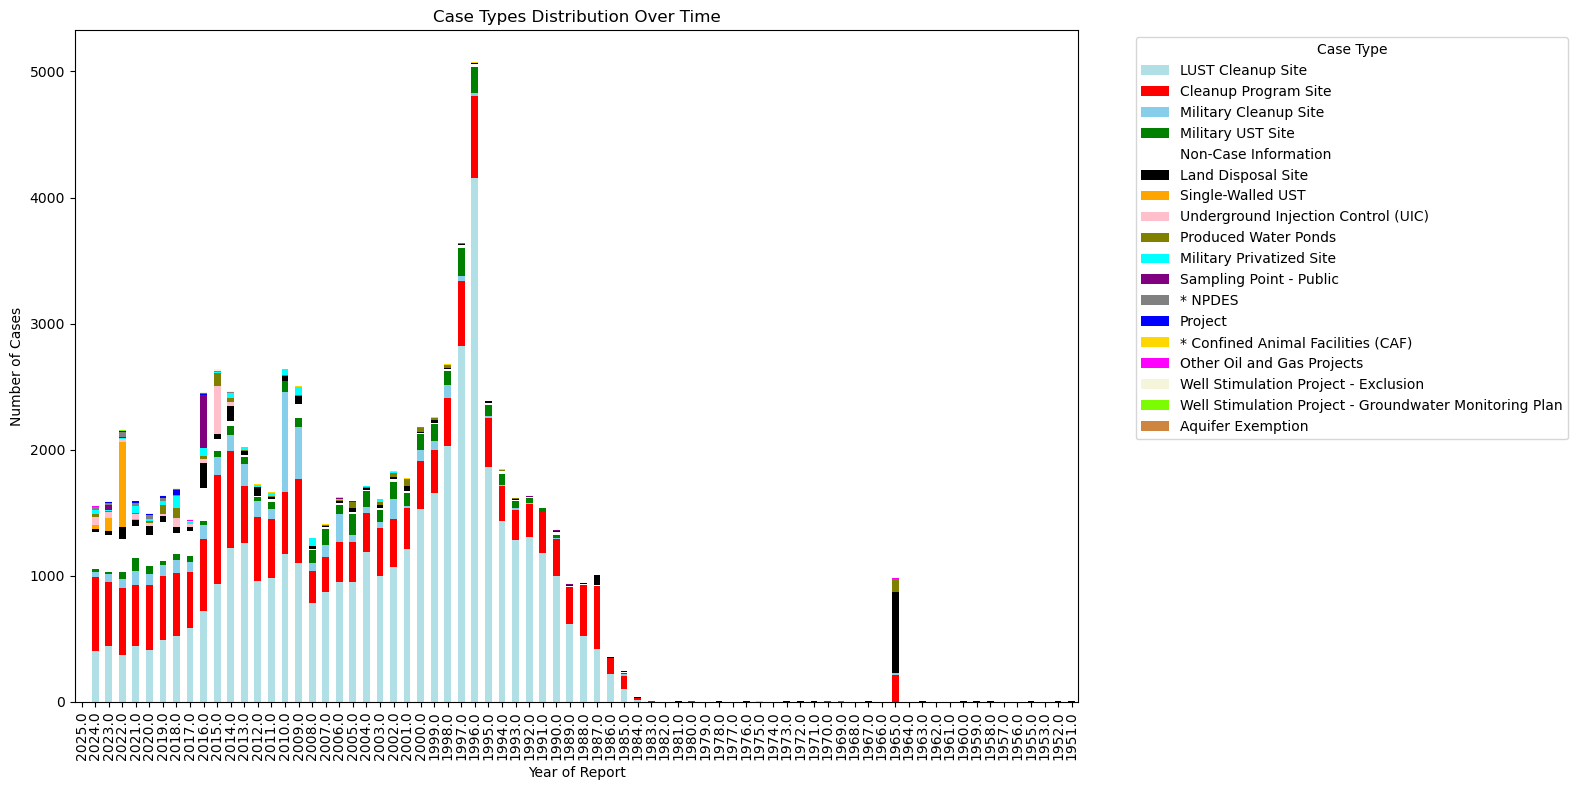

CASE_TYPE
LUST Cleanup Site                                         1996.0
Cleanup Program Site                                      2015.0
Military Cleanup Site                                     2010.0
Military UST Site                                         1997.0
Non-Case Information                                      2019.0
Land Disposal Site                                        1965.0
Single-Walled UST                                         2022.0
Underground Injection Control (UIC)                       2015.0
Produced Water Ponds                                      1965.0
Military Privatized Site                                  2018.0
Sampling Point - Public                                   2016.0
* NPDES                                                   2022.0
Project                                                   2018.0
* Confined Animal Facilities (CAF)                        2002.0
Other Oil and Gas Projects                                2018.0
Well Stimulatio

In [68]:
## Q3.B: How did the process of How has the frequency of groundwater contamination case updates evolved over time, and are there any specific years or periods that show a significant increase or decrease in update activity

try:
    clean_gwater

    #Create YEAR_updated column and the case_by_year DataFrame ---
    clean_gwater["YEAR_UPDATED"] = clean_gwater["STATUS_DATE"].dt.year
        
    # create the data frame
    
    case_by_year_updated = (clean_gwater.dropna(subset=['CASE_TYPE', 'YEAR_UPDATED'])
                                .groupby(["CASE_TYPE", "YEAR_UPDATED"])['GLOBAL_ID']
                                .count()
                                .unstack(fill_value=0)
                                .transpose())

    ###print("\n'case_by_year_updated' DataFrame:")
    ###print(case_by_year_updated.tail())

          #Delete invalid years (e.g. the year 2099 and 2212)
    drop_year = [ 2099,2212]
    existing_years_to_drop = [year for year in drop_year if year in case_by_year_updated.index]
    if existing_years_to_drop:
        case_by_year_updated = case_by_year_updated.drop(existing_years_to_drop)
        #print (existing_years_to_drop)


  
    # Sort dates
    case_by_year_sorted_dates = case_by_year_updated.sort_index(ascending=False)

    # Sort case types
    case_type_sums = case_by_year_sorted_dates.sum().sort_values(ascending=False)
    case_type_final_sorted = case_by_year_sorted_dates[case_type_sums.index]
    
    ###print("\n'case_by_year_sorted' :")
    ###print(case_type_final_sorted.tail())


    ## Visualising cases type vs. updated year 
    
    custom_colors = ['#b0dfe5', 'red', 'skyblue', 'green', 'white','black','orange','pink','olive','cyan','purple','gray','blue','gold','fuchsia'
                     ,'beige'
                    ,'lawngreen','peru']

    plt.figure(figsize=(16, 8))
    case_type_final_sorted.plot(kind='bar', stacked=True, ax=plt.gca(), color=custom_colors)
    plt.title('Case Types Distribution Over Time')
    plt.xlabel('Year of Report')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=90)
    plt.legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\n")
#case_type_final_sorted
year_highest_count = case_type_final_sorted.idxmax()
#year_highest_count

print (F"{year_highest_count}")




In [38]:
clean_gwater.to_csv("CalGwater.csv")